<a href="https://colab.research.google.com/github/Sonu2252/ARIMA-And-Seasonal-ARIMA/blob/master/ARIMA_and_SARIMA_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(r"https://raw.githubusercontent.com/krishnaik06/ARIMA-And-Seasonal-ARIMA/master/perrin-freres-monthly-champagne-.csv")

In [ ]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [ ]:
df.isnull()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
102,False,False
103,False,False
104,False,False
105,True,True


In [ ]:
df.columns = ["Month", "Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:
df = df.dropna()

In [ ]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [ ]:
df['Month'] = pd.to_datetime(df['Month'])

In [ ]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [ ]:
df.set_index('Month', inplace=True)

In [ ]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [ ]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


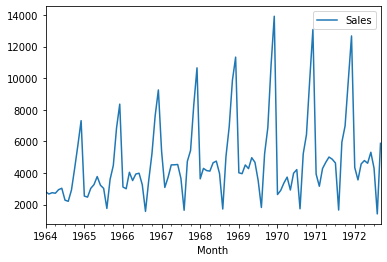

In [ ]:
df.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adfuller_test(sales):
  result = adfuller(sales)
  labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Ovesrvations Used']
  for value, label in zip(result, labels):
    print(label+' : '+str(value))
  if result[1] <= 0.05:
    print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
  else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")


In [ ]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276188
p-value : 0.363915771660247
#Lags Used : 11
Number of Ovesrvations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


In [ ]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [ ]:
df.head()

,Sales,Sales First Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [ ]:
df['Seasonal First Difference'] = df['Sales'] - df['Sales'].shift(12)

In [ ]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [ ]:
df1 = df['Seasonal First Difference'].dropna()

In [ ]:
adfuller_test(df1)

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Ovesrvations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


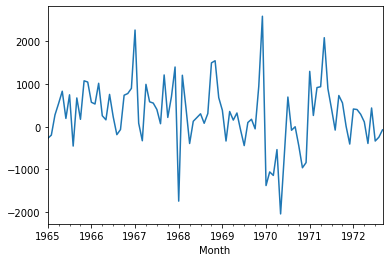

In [ ]:
df1.plot()

In [ ]:
from pandas.plotting import autocorrelation_plot

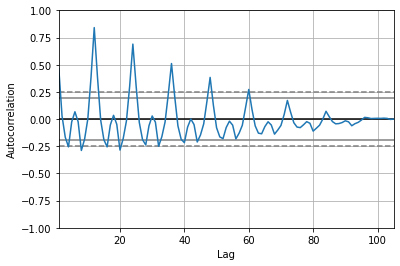

In [ ]:
autocorrelation_plot(df['Sales'])

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model = ARIMA(df['Sales'], order=(1, 1, 1))
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Mon, 13 Jun 2022   AIC                           1910.251
Time:                        17:53:20   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7846     12.405      1.837      0.069      -1.529      47.098
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

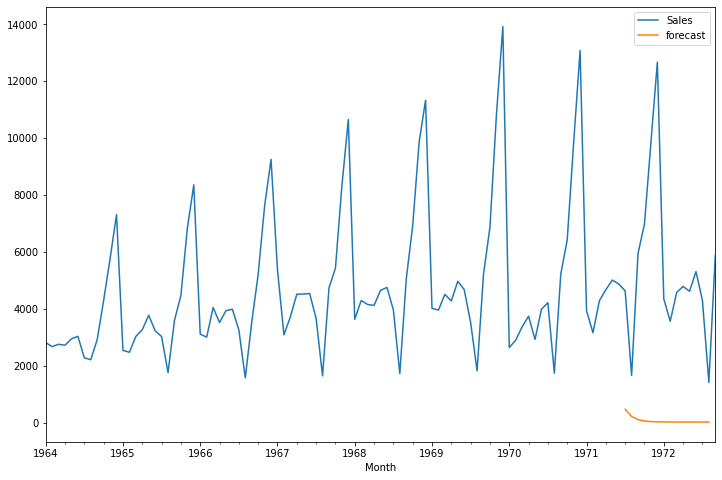

In [ ]:
df["forecast"] = model_fit.predict(start=90, end=103, dynamic=True)
df[['Sales', 'forecast']].plot(figsize=(12, 8))

In [ ]:
df['forecast']

Month
1964-01-01          NaN
1964-02-01          NaN
1964-03-01          NaN
1964-04-01          NaN
1964-05-01          NaN
                ...    
1972-05-01    22.892180
1972-06-01    22.831310
1972-07-01    22.804872
1972-08-01    22.793389
1972-09-01          NaN
Name: forecast, Length: 105, dtype: float64

In [38]:
import statsmodels.api as sm

In [ ]:
model = sm.tsa.statespace.SARIMAX(df['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
results = model.fit()
df['forecast'] = results.predict(start=90, end=103, dynamic=True)


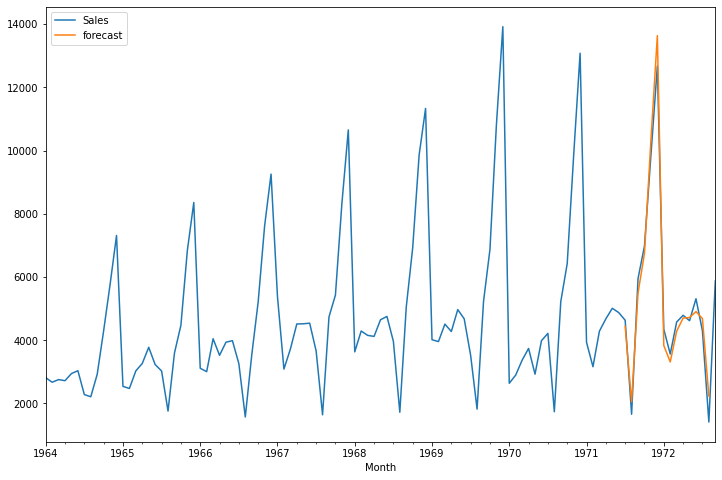

In [ ]:
df[["Sales", "forecast"]].plot(figsize=(12, 8))

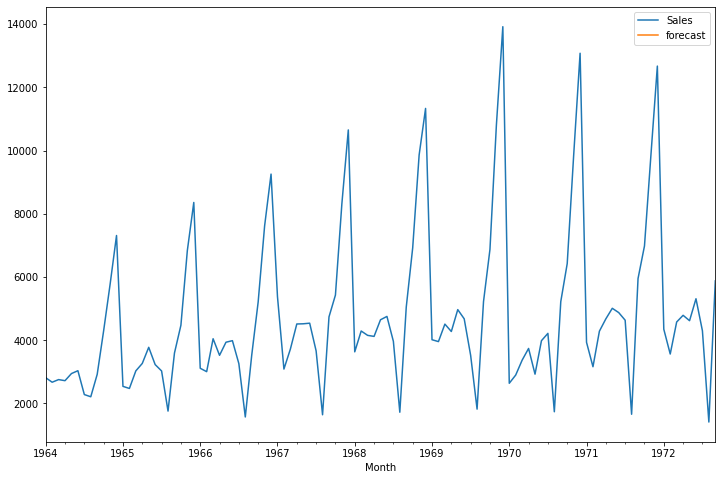

In [ ]:
df['forecast'] = results.predict(start=104, end=120, dynamic=True)
df[['Sales', 'forecast']].plot(figsize=(12, 8))

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
  plt.plot(time[start:end], series[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Value")
  if label:
    plt.legend(fontsize=4)
  plt.grid(True)

In [3]:
def trend(time, slope=0):
  return slope*time
  

In [4]:
time = np.arange(4*365+1)
print(time)

[   0    1    2 ... 1458 1459 1460]


In [5]:
baseline = 10
series = trend(time, 0.1)
print(series)

[0.000e+00 1.000e-01 2.000e-01 ... 1.458e+02 1.459e+02 1.460e+02]


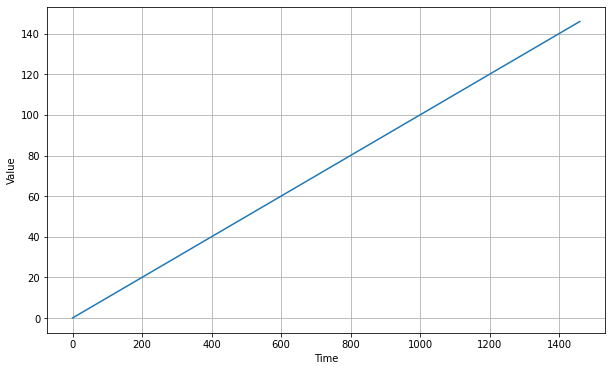

In [6]:
plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

In [7]:
def seasonal_pattern(season_time):
  return np.where(season_time < 0.4, np.cos(season_time*2*np.pi), 1/np.exp(3*season_time))

In [8]:
def sesonality(time, period, amplitude=1, phase=0):
  season_time = ((time+phase)%period)/period
  return amplitude * seasonal_pattern(season_time)

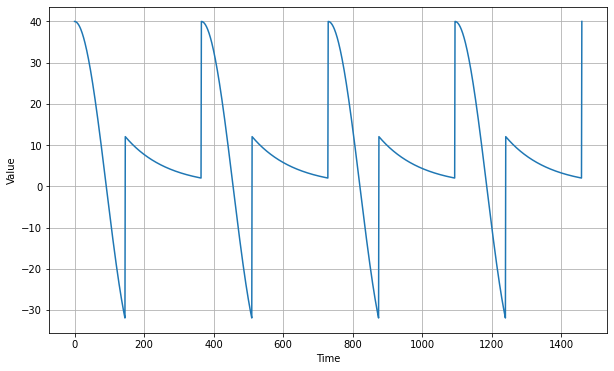

In [10]:
baseline = 10
amplitude = 40
series = sesonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plot_series(time,series)

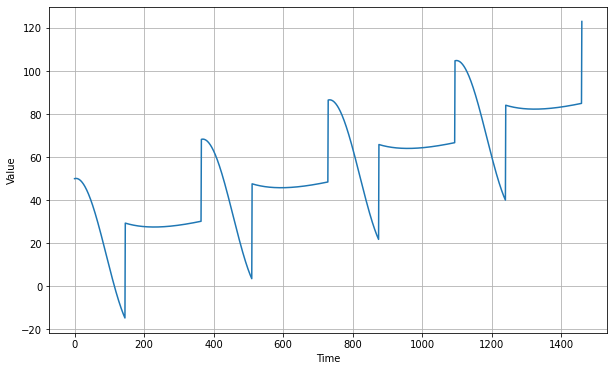

In [12]:
slope = 0.05
series = baseline + trend(time, slope) + sesonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

##Noise

In [13]:
def white_noise(time, noise_level=1, seed=None):
  rnd = np.random.RandomState(seed)
  return rnd.randn(len(time)) * noise_level

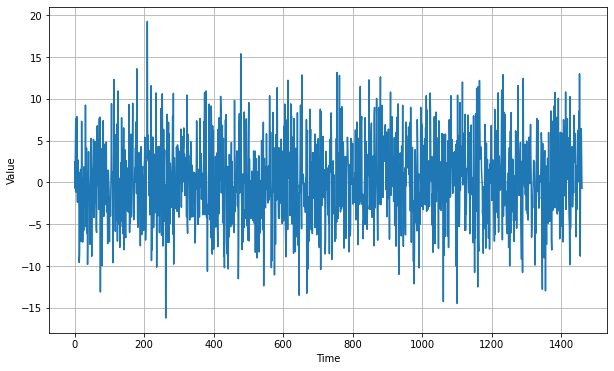

In [14]:
noise_level = 5
noise = white_noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, noise)
plt.show()

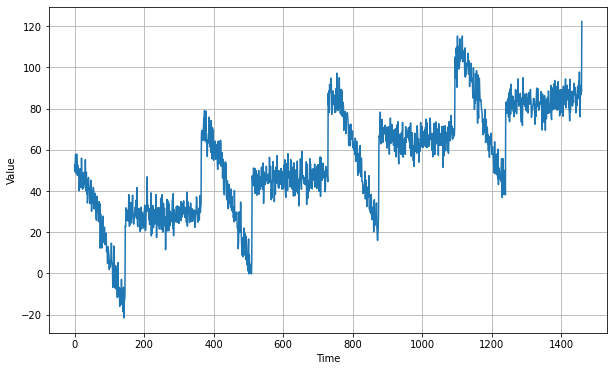

In [15]:
series = series+noise

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

In [16]:
split_time = 1000
time_train = time[:split_time]
X_train = series[:split_time]
time_valid = time[split_time:]
X_valid = series[split_time:]

In [18]:
import pandas as pd
df = pd.read_csv(r"https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv")
df.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


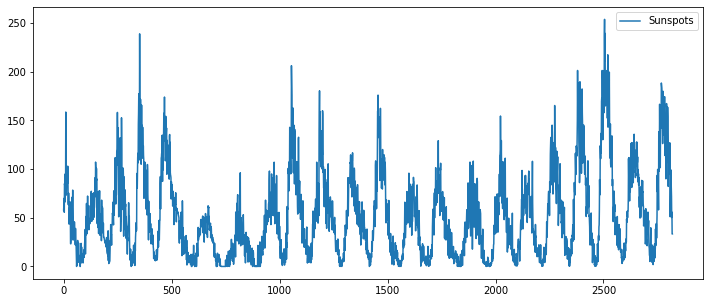

In [19]:
df.plot(figsize=(12, 5))

In [20]:
df['Month'] = pd.to_datetime(df['Month'])

In [21]:
df.head()

,Month,Sunspots
0,1749-01-01,58.0
1,1749-02-01,62.6
2,1749-03-01,70.0
3,1749-04-01,55.7
4,1749-05-01,85.0


In [28]:
df.tail()

,Sunspots
Month,
1983-08-01,71.8
1983-09-01,50.3
1983-10-01,55.8
1983-11-01,33.3
1983-12-01,33.4


In [29]:
df.shape

(2820, 1)

In [22]:
df.set_index('Month', inplace=True)

In [23]:
df.head()

,Sunspots
Month,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0


In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
def adfuller_test(sales):
  result = adfuller(sales)
  labels = ['ADF test Statistic', 'p-value', '#Lags used', 'No.of observations used']
  for value, label in zip(result, labels):
    print(label+ ': ' +str(value))
    if result[1] <= 0.05:
      print("Data has no unit root and is stationary.")
    else:
      print("It is stationary.")
    

In [27]:
adfuller_test(df['Sunspots'])

ADF test Statistic: -9.567667511913076
Data has no unit root and is stationary.
p-value: 2.333452143866306e-16
Data has no unit root and is stationary.
#Lags used: 27
Data has no unit root and is stationary.
No.of observations used: 2792
Data has no unit root and is stationary.


In [30]:
from statsmodels.tsa.arima_model import ARIMA

In [32]:
model = ARIMA(df['Sunspots'], order=(1, 1, 1))
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [33]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.Sunspots   No. Observations:                 2819
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11784.134
Method:                       css-mle   S.D. of innovations             15.820
Date:                Tue, 14 Jun 2022   AIC                          23576.267
Time:                        10:08:07   BIC                          23600.044
Sample:                    02-01-1749   HQIC                         23584.847
                         - 12-01-1983                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0071      0.139     -0.051      0.959      -0.279       0.265
ar.L1.D.Sunspots     0.2249      0.033      6.878      0.000       0.161       0.289
ma.L1.D.Sunspots    -0.6394      0.024    -26.177      0.000      -0.687      -0.592
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            4.4465           +0.0000j            4.4465            0.0000
MA.1            1.5640           +0.0000j            1.5640            0.0000
-----------------------------------------------------------------------------
"""

In [34]:
df['forecast'] = model_fit.predict(start=2400, end=2803, dynamic=True)

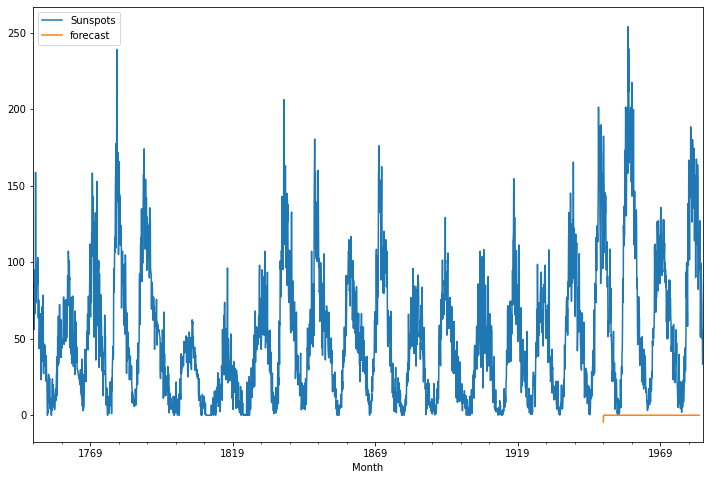

In [36]:
df[["Sunspots", "forecast"]].plot(figsize=(12, 8))

In [39]:
import statsmodels.api as sm
model_1 = sm.tsa.statespace.SARIMAX(df['Sunspots'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [40]:
results = model_1.fit()

In [41]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                           Sunspots   No. Observations:                 2820
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -11761.807
Date:                            Tue, 14 Jun 2022   AIC                          23533.614
Time:                                    10:16:47   BIC                          23563.314
Sample:                                01-01-1749   HQIC                         23544.333
                                     - 12-01-1983                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2325      0.028      8.296      0.000       0.178       0.287
ma.L1         -0.6515      0.022    -29.688      0.000      -0.695      -0.608
ar.S.L12       0.0589      0.015      3.910      0.000       0.029       0.088
ma.S.L12      -0.9995      0.071    -14.028      0.000      -1.139      -0.860
sigma2       249.6292     17.745     14.068      0.000     214.850     284.409
===================================================================================
Ljung-Box (Q):                      155.06   Jarque-Bera (JB):              1048.08
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.38   Skew:                             0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

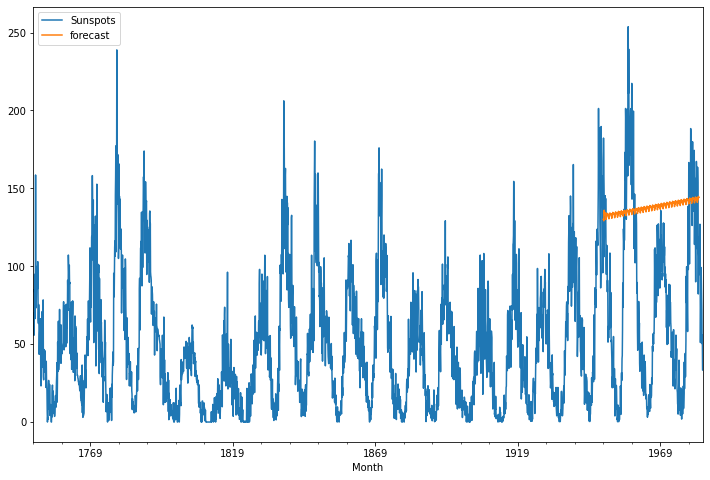

In [43]:
df['forecast'] = results.predict(start=2400, end=2803, dynamic=True)
df[['Sunspots', 'forecast']].plot(figsize=(12, 8))